<h1> Analysing the IMDB 5000 Movie Dataset with IMDB Prediction Score </h1>

In this notebook I have worked on IMDB 5000 Movie Dataset and perform the following tasks:

1. Analyzed which genre of movies has the highest average score in IMDB.

2. Analyzed some other data set features and identified the top 5 numerical features impacting the Imdb performance using the correlations.

3. Based on these 5 numerical attributes, 3 separate machine learning algorithms were used to predict the imdb performance.

In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

In [2]:
#loading the dataset
df = pd.read_csv('movie_metadata.csv')
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3648,Color,Vic Sarin,37.0,101.0,24.0,130.0,Aidan Quinn,933.0,NaN,Drama|Family,Connie Nielsen,A Shine of Rainbows,1696,1940,John Bell,2.0,island|love|new home|orphan|rainbow,http://www.imdb.com/title/tt1014774/?ref_=fn_t...,19.0,English,Canada,PG,6000000.0,2009.0,767.0,7.2,2.35,1000
727,Color,Peter Billingsley,166.0,113.0,0.0,721.0,Kristin Davis,4000.0,109176215.0,Comedy,Jon Favreau,Couples Retreat,83506,8172,Tasha Smith,6.0,couple|island|marriage|tropical|voyeurism,http://www.imdb.com/title/tt1078940/?ref_=fn_t...,144.0,English,USA,PG-13,60000000.0,2009.0,722.0,5.5,1.85,0
1818,Black and White,NaN,15.0,30.0,NaN,94.0,Art Carney,491.0,NaN,Comedy|Family,Jackie Gleason,The Honeymooners,3446,812,Joyce Randolph,4.0,1950s|bus driver|money scheme|poverty|sewer,http://www.imdb.com/title/tt0042114/?ref_=fn_t...,31.0,English,USA,NaN,NaN,NaN,154.0,8.7,1.33,459
4548,Color,Davis Guggenheim,372.0,96.0,49.0,NaN,Al Gore,861.0,23808111.0,Documentary,Billy West,An Inconvenient Truth,67654,929,NaN,0.0,climate|earth|global warming|science|truth,http://www.imdb.com/title/tt0497116/?ref_=fn_t...,504.0,English,USA,PG,NaN,2006.0,68.0,7.5,1.85,0
3076,Color,Oliver Parker,105.0,97.0,32.0,327.0,Rupert Everett,893.0,18535191.0,Comedy|Romance,Minnie Driver,An Ideal Husband,12980,2640,Jeremy Northam,3.0,bachelor|blackmail|character says i love you|f...,http://www.imdb.com/title/tt0122541/?ref_=fn_t...,132.0,English,UK,PG-13,14000000.0,1999.0,692.0,6.9,1.85,646


In [3]:
df.columns,df.shape

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'),
 (5043, 28))

**Checking for Null values in the dataset**

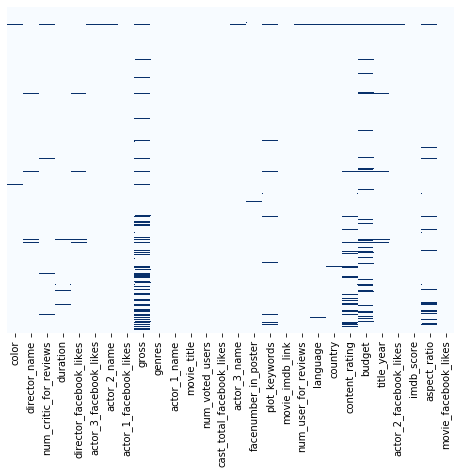

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [5]:
# Movie with the lowest Imdb rating is Documentary `Justin Bieber: Never Say Never`
df_low_imdb=df[df['imdb_score']==1.6]
df_low_imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2834,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,Justin Bieber: Never Say Never,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [6]:
# Movie with the highest Imdb rating is Comedy `Towering Inferno`
df_max_imdb=df[df['imdb_score']==9.5]
df_max_imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,Martin Short,Towering Inferno,10,1125,Joe Flaherty,2.0,NaN,http://www.imdb.com/title/tt0691996/?ref_=fn_t...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0


**Creating a histogram of all the features in dataframe**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B4F2AE348>,
      dtype=object)

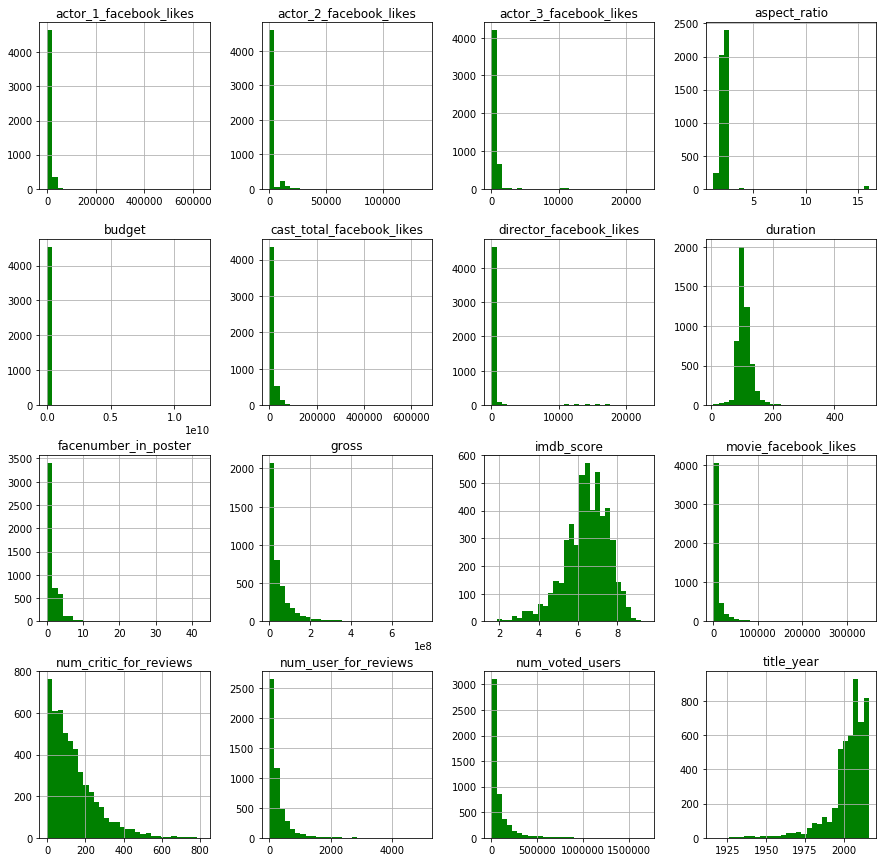

In [7]:
df.hist(bins=30,figsize=(15,15),color='g')

**Creating a new column in the dataframe which shows the number of different genres a movie has!**

In [8]:
df['genres_num'] = df.genres.apply(lambda x: len(x.split('|')))

In [9]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3


In [10]:
df['genres_num'].max()

8

In [11]:
df[df['genres_num']==8]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num
902,Color,Don Bluth,78.0,94.0,383.0,753.0,Kelsey Grammer,4000.0,58297830.0,Adventure|Animation|Drama|Family|Fantasy|Music...,Kirsten Dunst,Anastasia,86347,6017,Bernadette Peters,1.0,amnesia|reference to anastasia romanov|romanov...,http://www.imdb.com/title/tt0118617/?ref_=fn_t...,191.0,English,USA,G,50000000.0,1997.0,808.0,7.1,2.35,0,8
1387,Color,John Frankenheimer,126.0,124.0,287.0,475.0,James Frain,9000.0,23360779.0,Action|Adventure|Crime|Drama|Family|Fantasy|Ro...,Charlize Theron,Reindeer Games,31113,10838,Clarence Williams III,0.0,casino|christmas|christmas season|girlfriend|r...,http://www.imdb.com/title/tt0184858/?ref_=fn_t...,212.0,English,USA,R,34000000.0,2000.0,1000.0,5.7,2.35,852,8
2340,Color,Kevin Munroe,138.0,107.0,14.0,311.0,Laura Spencer,403.0,1183354.0,Action|Comedy|Crime|Fantasy|Horror|Mystery|Sci...,Marco St. John,Dylan Dog: Dead of Night,13026,1577,Anita Briem,1.0,close up of eyes|monster|quirkiness|supernatur...,http://www.imdb.com/title/tt1013860/?ref_=fn_t...,75.0,English,USA,PG-13,20000000.0,2010.0,368.0,5.1,2.35,0,8
3539,NaN,Richard Rich,2.0,45.0,24.0,29.0,Kate Higgins,122.0,NaN,Action|Adventure|Animation|Comedy|Drama|Family...,Debi Derryberry,Alpha and Omega 4: The Legend of the Saw Tooth...,192,236,Cindy Robinson,0.0,blindness|cave|spirit|wolf|wolf cub,http://www.imdb.com/title/tt4061848/?ref_=fn_t...,6.0,NaN,USA,NaN,7000000.0,2014.0,35.0,6.0,NaN,41,8


**Creating a new column in the dataframe which replaces '|' in genres column to!**

In [12]:
df['Type_of_genres'] = df.genres.apply(lambda x: x.replace('|',','))
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3,"Action,Adventure,Fantasy"


**Creating a new column in the dataframe which shows only the first genre type of a movie. This will help to sort the movies on single genre type.**

In [13]:
df['genres_first'] = df.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [14]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_num,Type_of_genres,genres_first
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4,"Action,Adventure,Fantasy,Sci-Fi",Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,3,"Action,Adventure,Fantasy",Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,3,"Action,Adventure,Thriller",Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,2,"Action,Thriller",Action
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,1,Documentary,Documentary


**Analysing which movie genre has the best imdb score.**

From the graph it's clear that Documentaries are rated highest on Imdb whereas Thriller are least rated.

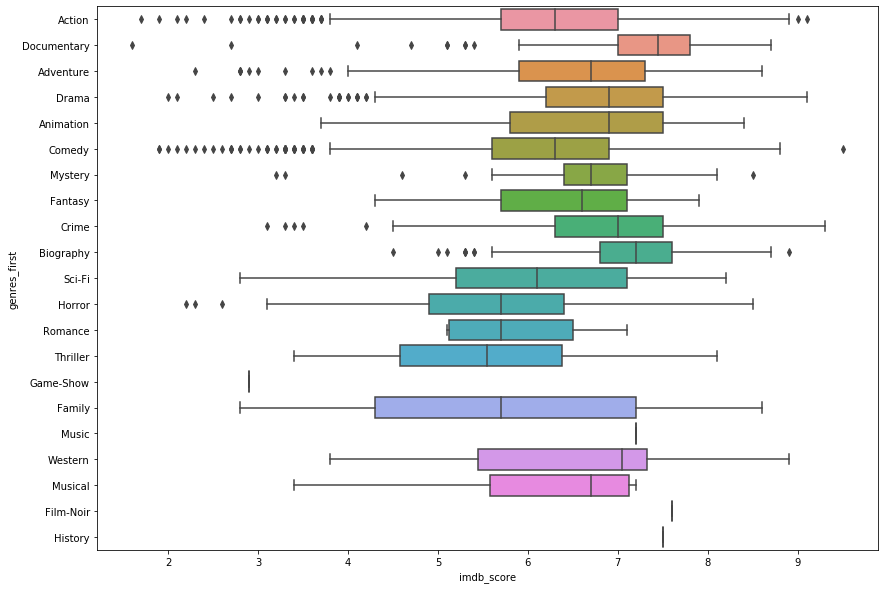

In [15]:
plt.figure(figsize=(14,10))
sns.boxplot(x='imdb_score',y='genres_first',data=df)

**Finding which numerical features have the most influence on Imdb score.**

selecting the top 5 features for my predictive model.

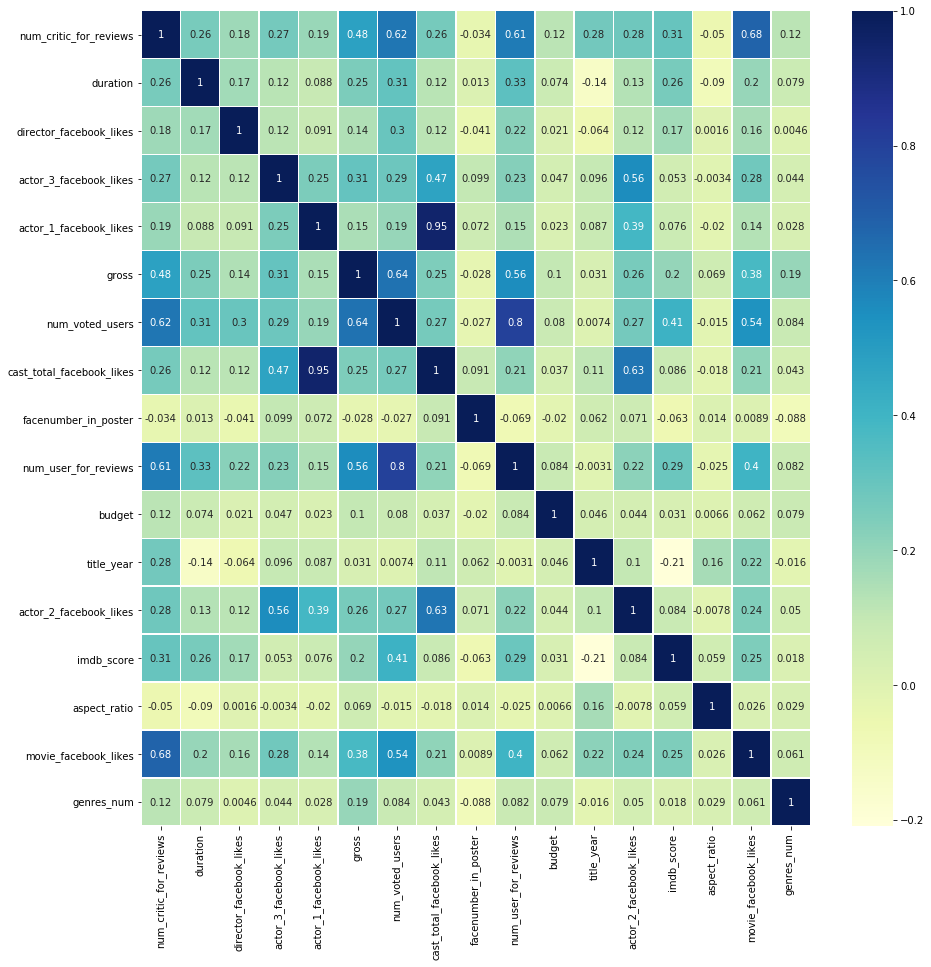

In [16]:
correlations = df.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

**The top 5 features that I am selecting for building the predictive model are following:**

In [17]:
df_for_ML = df[['num_critic_for_reviews','duration','director_facebook_likes','num_voted_users','num_user_for_reviews']]

**Making a pivot table to find the average imdb score for different movie genre.**

In [18]:
pd.pivot_table(df,index='genres_first', values='imdb_score').sort_values('imdb_score', ascending = False)

# There seems some outliers here. As we saw clearly above in our boxplot that Documentary are highest rated on an average.

,imdb_score
genres_first,
Film-Noir,7.600000
History,7.500000
Music,7.200000
Documentary,7.167857
Biography,7.159127
Crime,6.906877
Drama,6.767181
Animation,6.631148
Western,6.583333


**Number of movies released every year.**

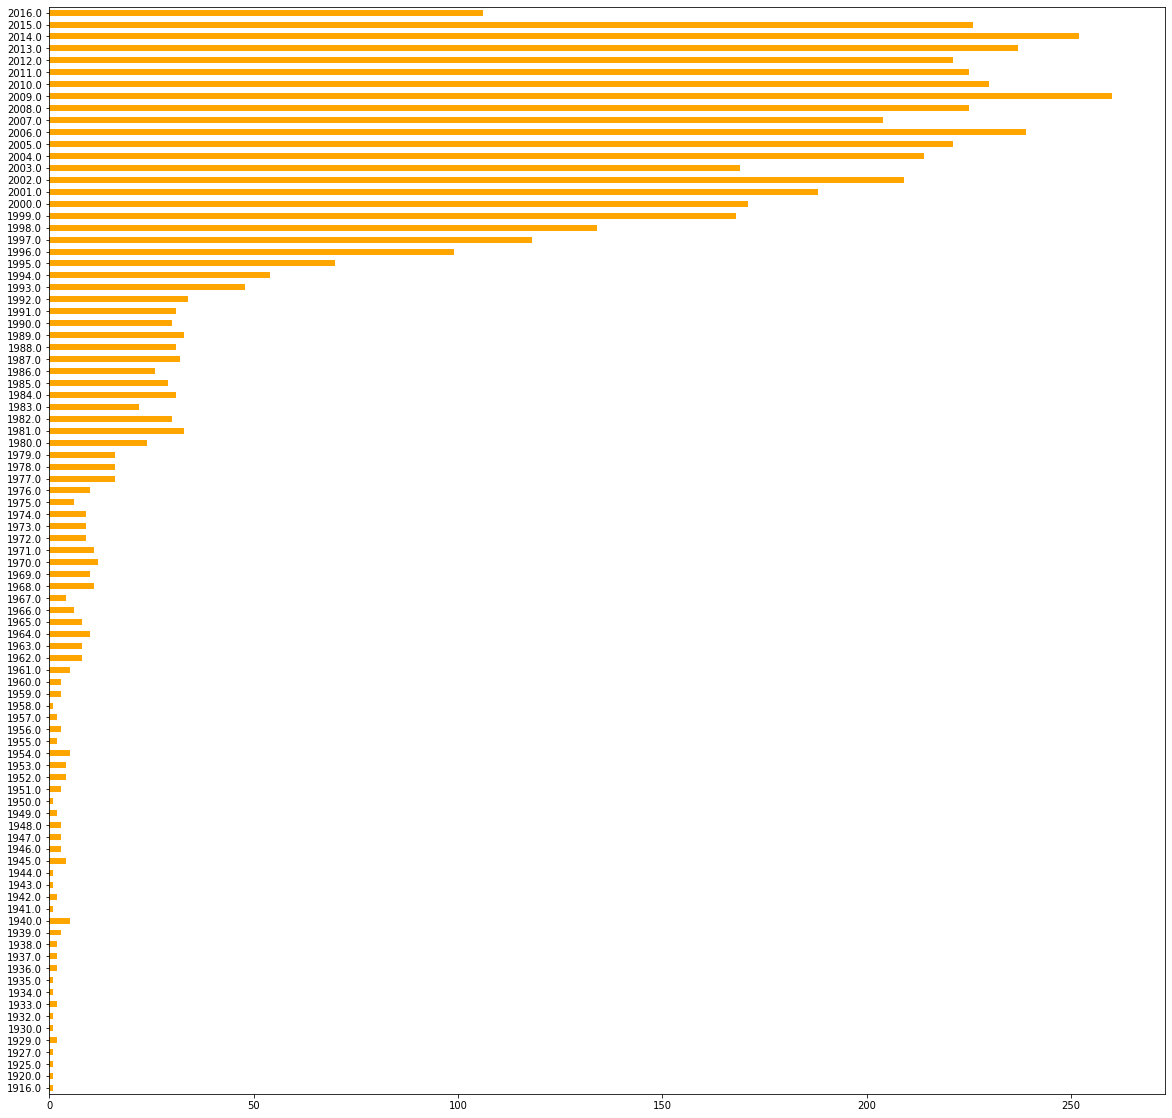

In [19]:
df.title_year.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='orange')

**Number of movies as per different genre type.**

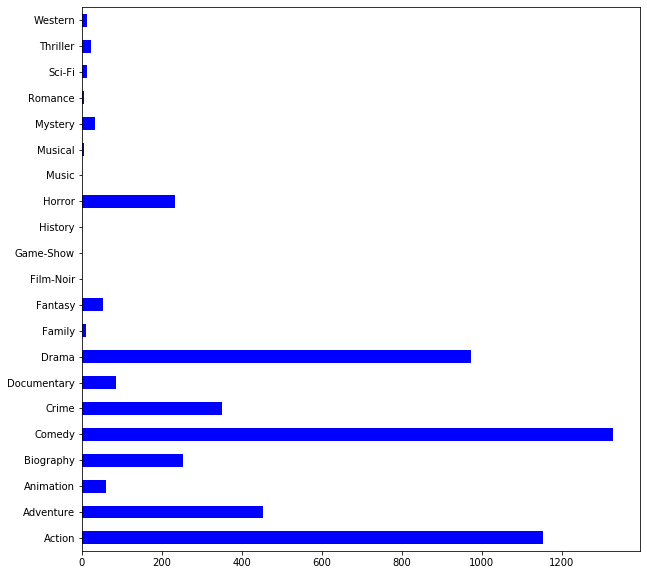

In [20]:
df.genres_first.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(10,10),color='blue')

**Number of movies as per countries.**

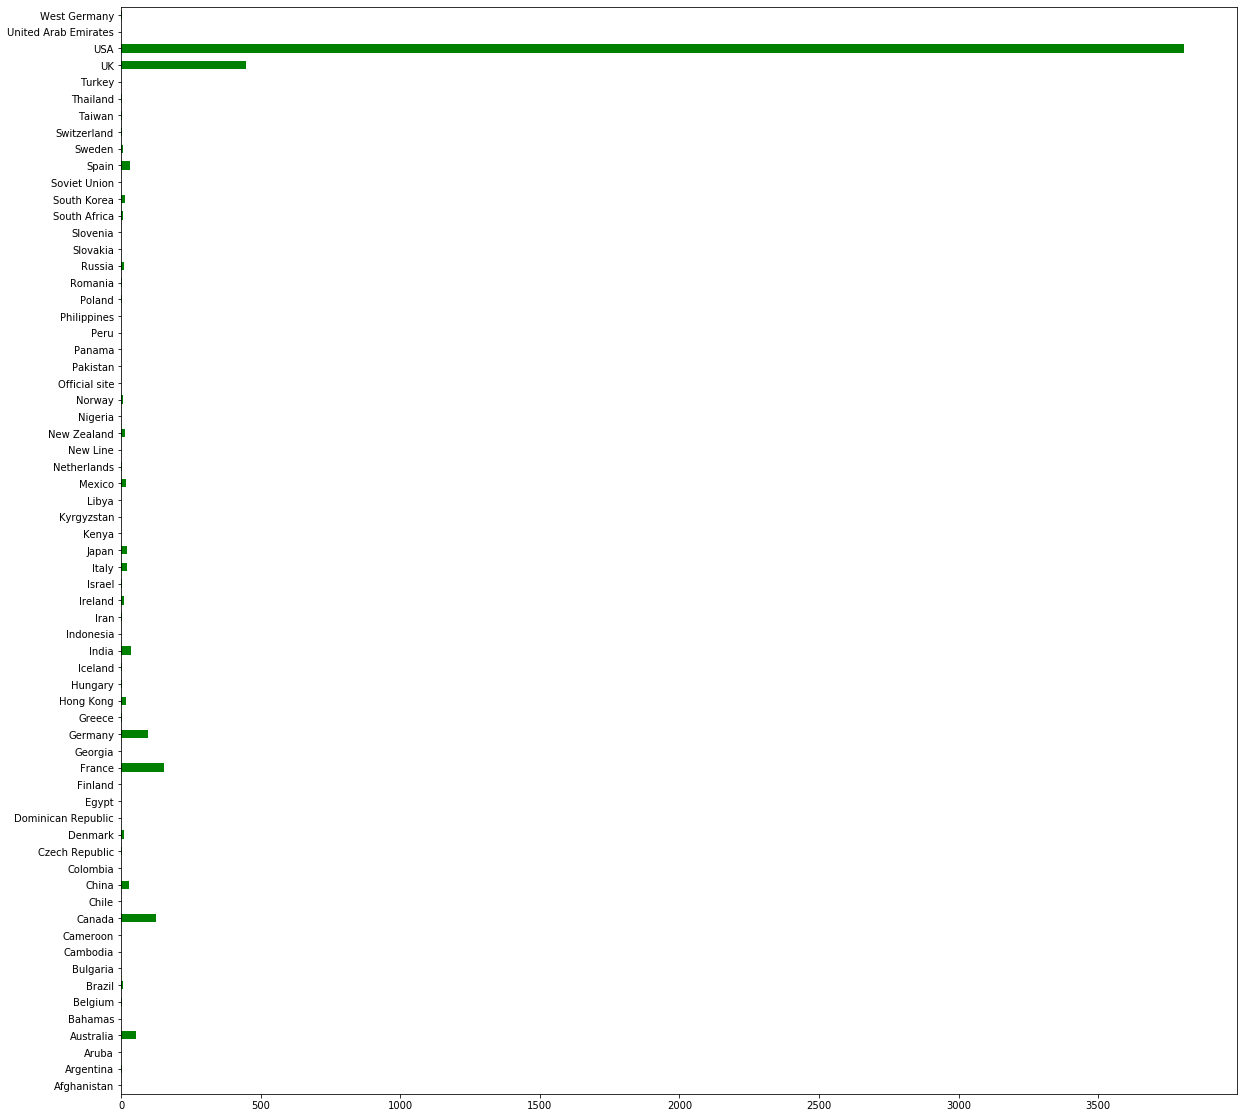

In [21]:
df.country.value_counts(dropna=True).sort_index().plot(kind='barh',figsize=(20,20),color='g')

In [22]:
df_for_ML.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,num_voted_users,num_user_for_reviews
0,723.0,178.0,0.0,886204,3054.0
1,302.0,169.0,563.0,471220,1238.0


**Plotting graphs of all the feautres I selected for my ML model against the imdb score**

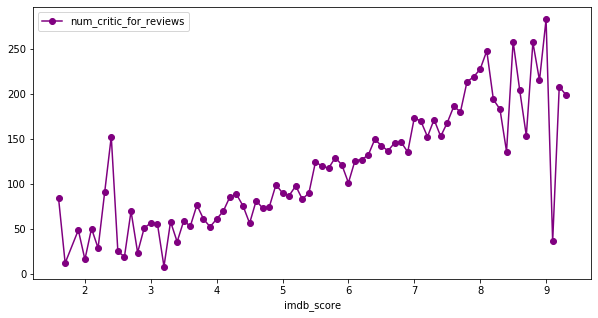

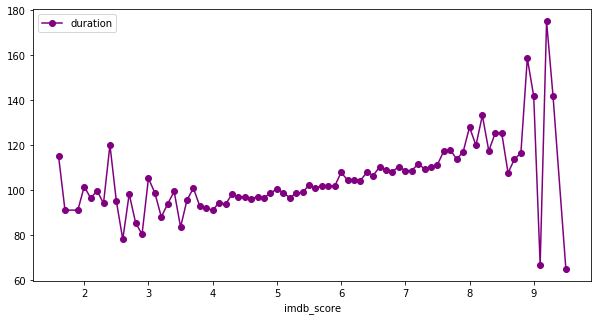

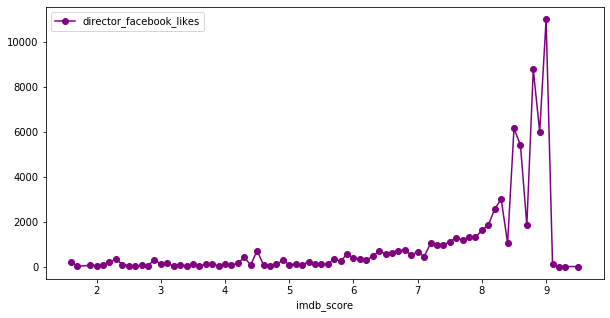

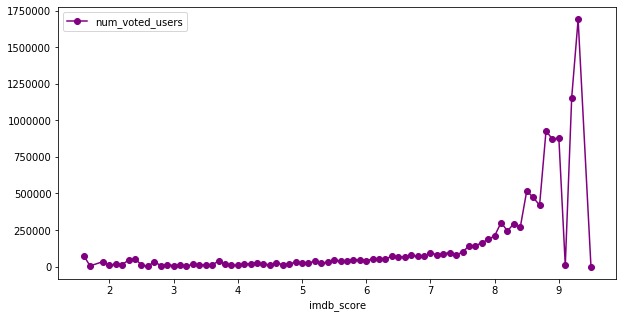

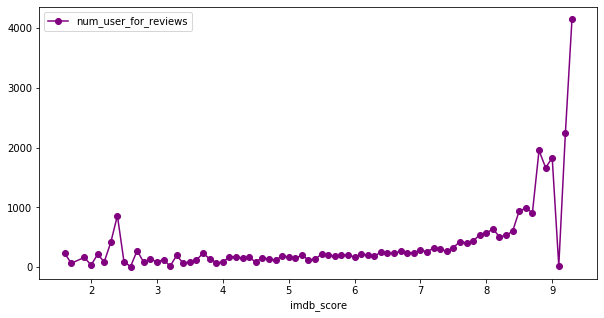

In [23]:
for i in df_for_ML.columns:
    axis = df.groupby('imdb_score')[[i]].mean().plot(figsize=(10,5),marker='o',color='purple')

**Filling up all the missing values with the mean of all the values in that particular feature**

In [24]:
df_for_ML["num_critic_for_reviews"] = df_for_ML["num_critic_for_reviews"].fillna(df["num_critic_for_reviews"].mean())
df_for_ML["duration"] = df_for_ML["duration"].fillna(df["duration"].mean())
df_for_ML["director_facebook_likes"] = df_for_ML["director_facebook_likes"].fillna(df["director_facebook_likes"].mean())
df_for_ML["num_user_for_reviews"] = df_for_ML["num_user_for_reviews"].fillna(df["num_user_for_reviews"].mean())
df_for_ML["num_voted_users"] = df_for_ML["num_voted_users"].fillna(df["num_voted_users"].mean())

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

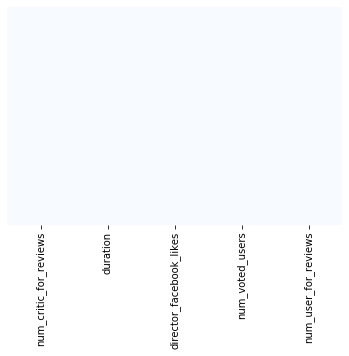

In [25]:
sns.heatmap(df_for_ML.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [26]:
df_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   5043 non-null   float64
 1   duration                 5043 non-null   float64
 2   director_facebook_likes  5043 non-null   float64
 3   num_voted_users          5043 non-null   int64  
 4   num_user_for_reviews     5043 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 197.1 KB


**Splitting the data for training and testing.**

In [27]:
from sklearn.model_selection import train_test_split
X = df_for_ML
y = df['imdb_score']
X.shape,y.shape

((5043, 5), (5043,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using the linear regression model for predicting the the imdb score.**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
prec_lm=lm.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('The mean squared error using Linear regression is: ',mean_squared_error(y_test,prec_lm))
print('The mean absolute error using Linear regression is: ',mean_absolute_error(y_test,prec_lm))

The mean squared error using Linear regression is:  1.1220360853185256
The mean absolute error using Linear regression is:  0.7918093523195873


In [32]:
#using the Xgboost model for predicting the the imdb score.
from xgboost import XGBClassifier
Xgb = XGBClassifier()
Xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
prec_Xgb=Xgb.predict(X_test)

In [34]:
print('The mean squared error using the Xgboost model is: ',mean_squared_error(y_test,prec_Xgb))
print('The mean absolute error using the Xgboost model is: ',mean_absolute_error(y_test,prec_Xgb))

The mean squared error using the Xgboost model is:  1.3661942517343906
The mean absolute error using the Xgboost model is:  0.8466798810703667


**Using the Random Forest model for predicting the the imdb score.**

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
prec_rf=rf.predict(X_test)

In [37]:
print('The mean squared error using Random Forest model is: ',mean_squared_error(y_test,prec_rf))
print('The mean absolute error using Random Forest model is: ',mean_absolute_error(y_test,prec_rf))

The mean squared error using Random Forest model is:  0.9384686630327057
The mean absolute error using Random Forest model is:  0.7140128840436076


Finally..!


The random forest model has perforemed the best with **MSE of '0.935' and MAE of '0.711'**

The documentries are on a average highest rated on IMDB.¶

Number of users that vote for a particular movie influence the Imdb score the most.